In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Jam Belajar (X) vs Lulus (y)
X = np.array([1, 2, 3, 4])  # Fitur
y = np.array([0, 0, 1, 1])  # Target (0: Tidak Lulus, 1: Lulus)


In [2]:
# Fungsi Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fungsi Loss (Log Loss)
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [3]:
# Inisialisasi parameter
beta_0 = 0  # Intercept
beta_1 = 0  # Slope
learning_rate = 0.1
epochs = 1000
loss_history = []

# Gradient Descent
for epoch in range(epochs):
    # Hitung prediksi/probabilitas
    z = beta_0 + beta_1 * X
    y_pred = sigmoid(z)
    
    # Hitung gradient
    grad_beta_0 = np.mean(y_pred - y)
    grad_beta_1 = np.mean((y_pred - y) * X)
    
    # Update parameter
    beta_0 -= learning_rate * grad_beta_0
    beta_1 -= learning_rate * grad_beta_1
    
    # Simpan loss untuk plotting
    loss = compute_loss(y, y_pred)
    loss_history.append(loss)


In [4]:
# Prediksi setelah training
def predict(x, threshold=0.5):
    z = beta_0 + beta_1 * x
    prob = sigmoid(z)
    return 1 if prob >= threshold else 0

In [5]:
# Contoh prediksi
x_test = 2.5
print(f"Probabilitas lulus (jam belajar={x_test}): {sigmoid(beta_0 + beta_1 * x_test):.2f}")
print(f"Prediksi kelas (threshold=0.5): {predict(x_test)}")


Probabilitas lulus (jam belajar=2.5): 0.57
Prediksi kelas (threshold=0.5): 1


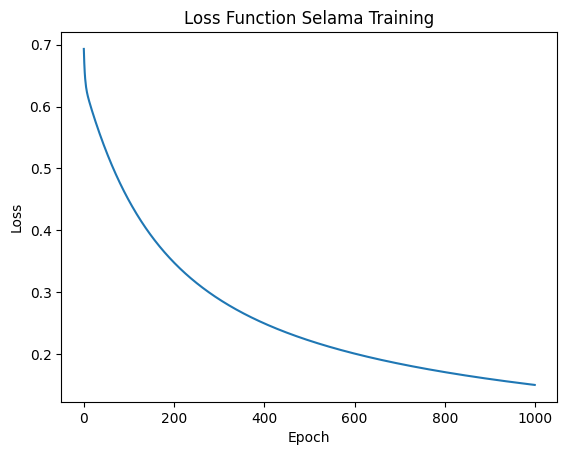

In [6]:
# Plot Loss selama training
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Selama Training')
plt.show()


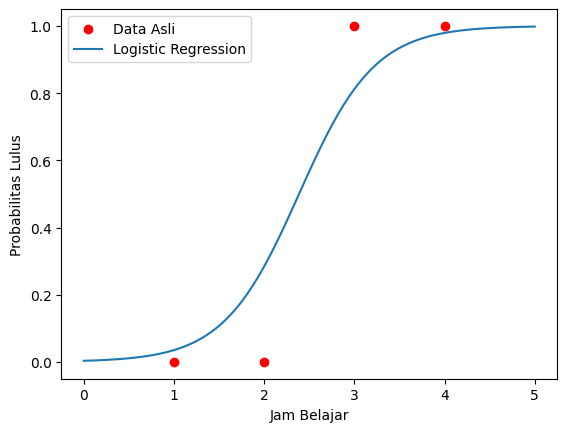

In [7]:
# Plot Data dan Kurva Sigmoid
plt.scatter(X, y, color='red', label='Data Asli')
x_range = np.linspace(0, 5, 100)
plt.plot(x_range, sigmoid(beta_0 + beta_1 * x_range), label='Logistic Regression')
plt.xlabel('Jam Belajar')
plt.ylabel('Probabilitas Lulus')
plt.legend()
plt.show()

Intercept (β0): -2.40, Slope (β1): 0.96
Probabilitas lulus (jam belajar=2.5): 0.50


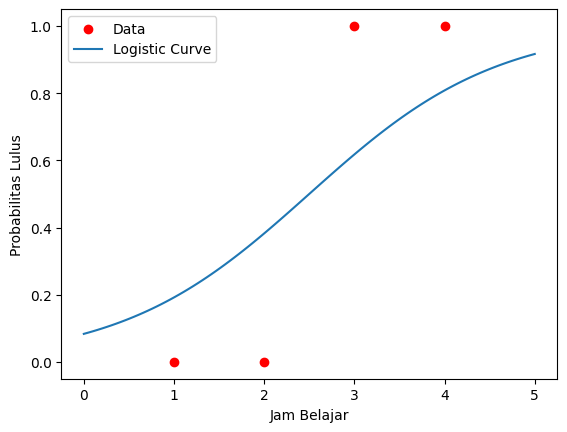

In [8]:
# contoh dengan sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([0, 0, 1, 1])

# Train model
model = LogisticRegression()
model.fit(X, y)

# Koefisien
print(f"Intercept (β0): {model.intercept_[0]:.2f}, Slope (β1): {model.coef_[0][0]:.2f}")

# Prediksi
x_test = 2.5
prob = model.predict_proba([[x_test]])[0][1]
print(f"Probabilitas lulus (jam belajar={x_test}): {prob:.2f}")

# Plot
plt.scatter(X, y, color='red', label='Data')
x_range = np.linspace(0, 5, 100).reshape(-1, 1)
prob_range = model.predict_proba(x_range)[:, 1]
plt.plot(x_range, prob_range, label='Logistic Curve')
plt.xlabel('Jam Belajar')
plt.ylabel('Probabilitas Lulus')
plt.legend()
plt.show()

# Real Case Diabetes

In [9]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
# import pandas as pd

# # Unduh dataset ke direktori lokal
# kagglehub.download_dataset(
#     "uciml/pima-indians-diabetes-database",
#     "./Dataset"  # Direktori tujuan
# )

# # Path ke file dataset
# file_path = "./Dataset/diabetes.csv"  # Pastikan nama file sesuai dengan dataset

# # Muat dataset menggunakan pandas
# df = pd.read_csv(file_path)

# # Tampilkan 5 baris pertama
# print("First 5 records:")
# print(df.head())

In [10]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

# print("Path to dataset files:", path)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


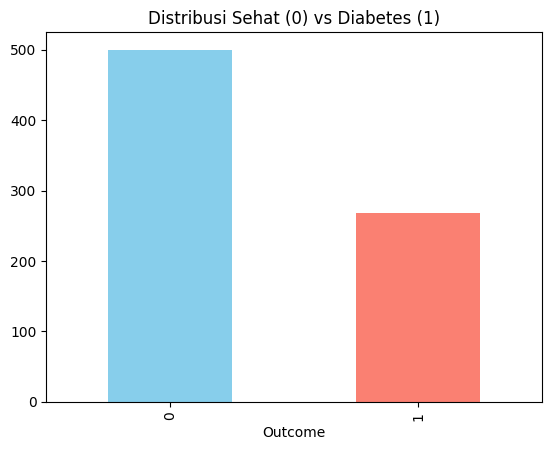

In [15]:
# Cek distribusi target
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Sehat (0) vs Diabetes (1)')
plt.show()

In [16]:
# Ganti 0 dengan median
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, df[cols].median())

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inisialisasi model
model = LogisticRegression(max_iter=1000)

# Training
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

Akurasi: 0.7662337662337663
Confusion Matrix:
 [[82 17]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



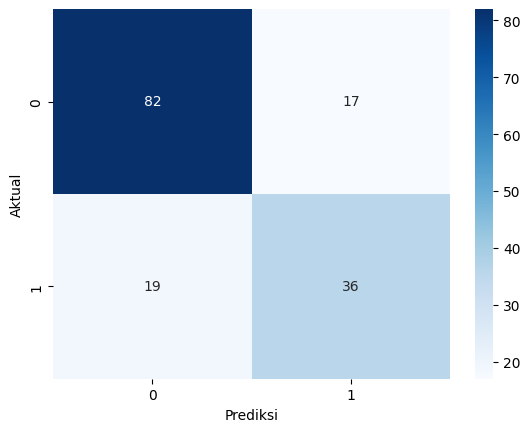

In [21]:
# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [22]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
print("Parameter Terbaik:", grid_search.best_params_)

Parameter Terbaik: {'C': 1, 'penalty': 'l1'}


In [24]:
import joblib

# Simpan model dan scaler
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load model
loaded_model = joblib.load('diabetes_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Contoh prediksi baru
new_data = [[1, 120, 70, 30, 100, 25, 0.3, 25]]  # Contoh input pasien
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
print("Prediksi:", "Diabetes" if prediction[0] == 1 else "Sehat")

Prediksi: Sehat


c:\Users\ariop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
